In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('StudentsPerformance.csv')

In [3]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
!pip install dabl

Target looks like regression


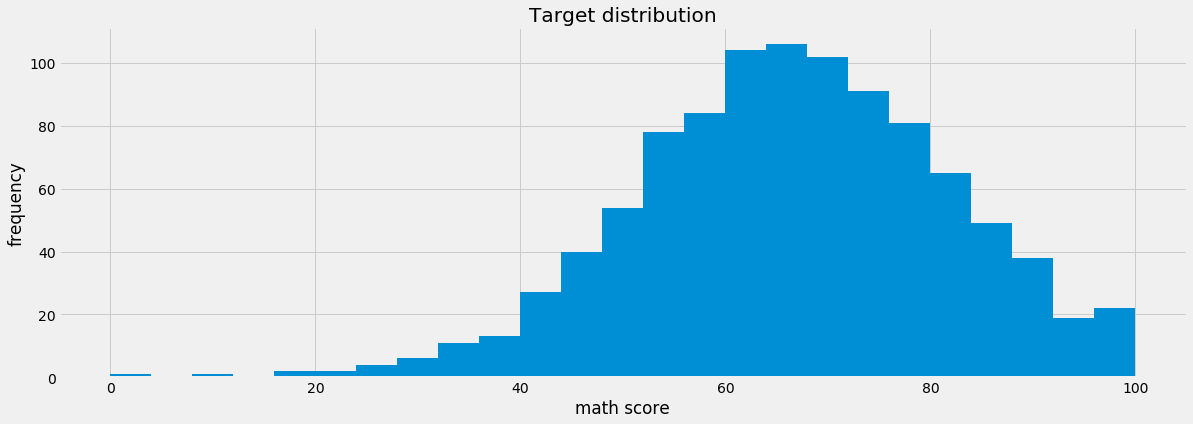

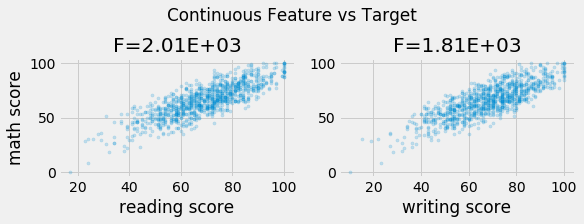

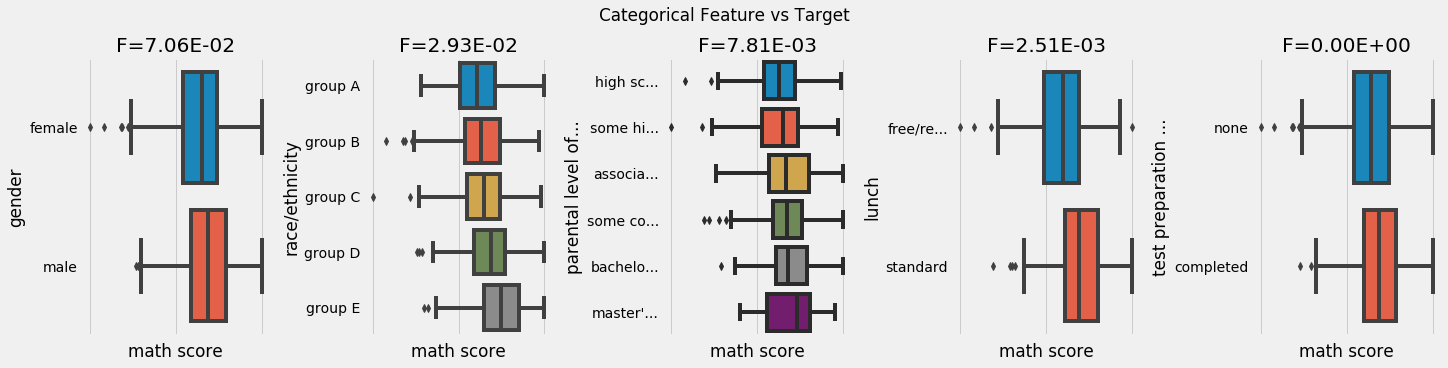

In [6]:
import dabl
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'math score')

Target looks like regression


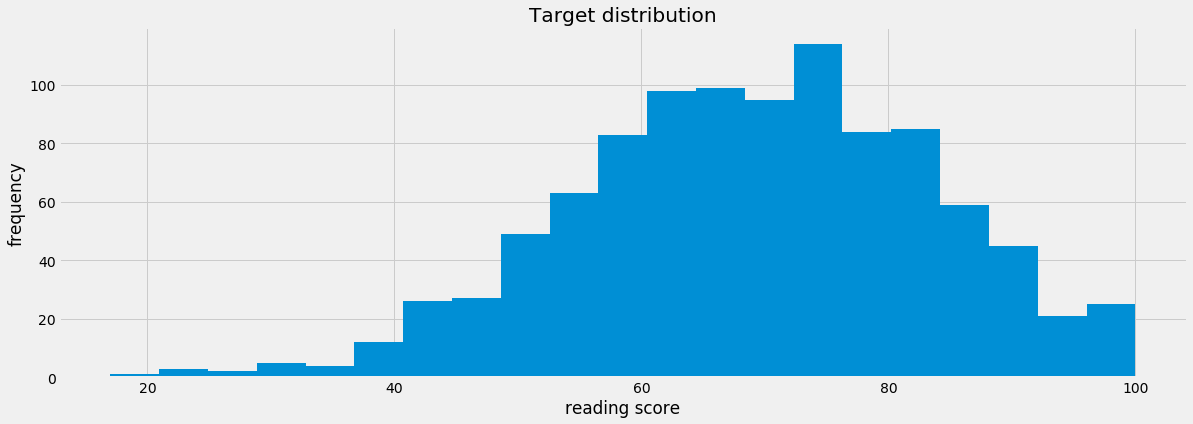

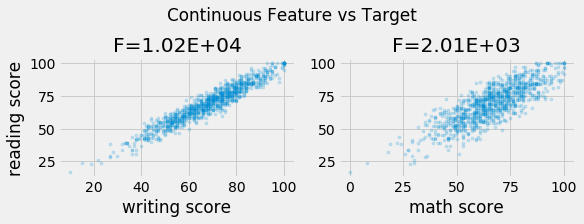

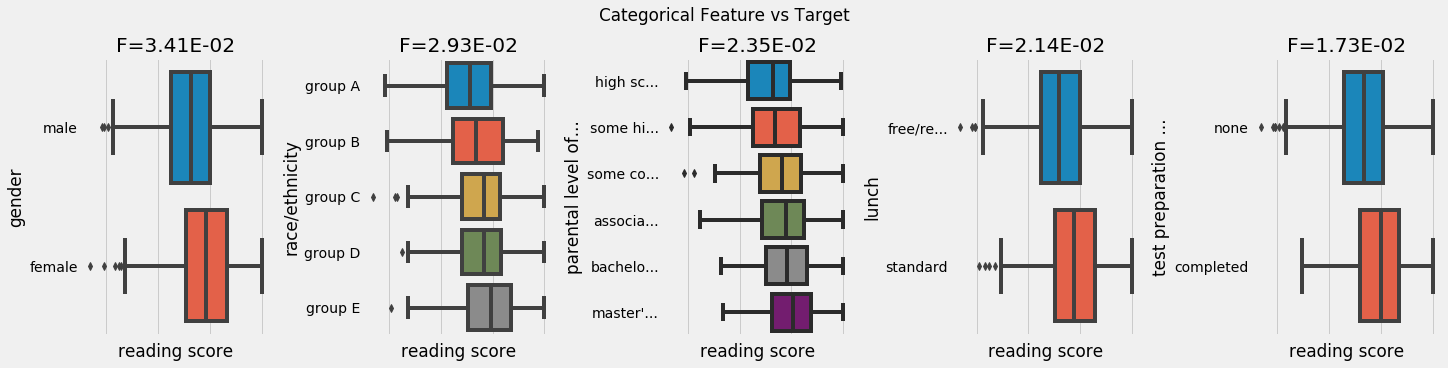

In [7]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'reading score')

Target looks like regression


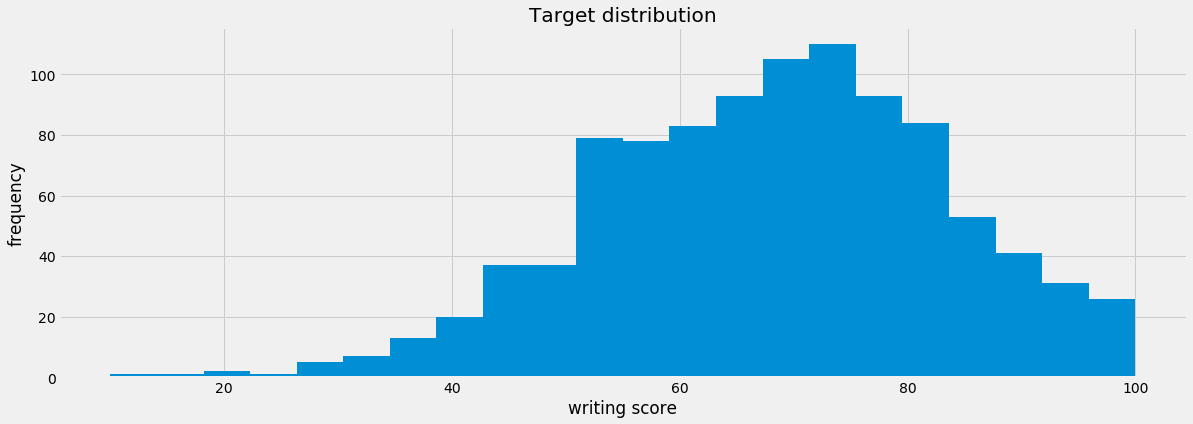

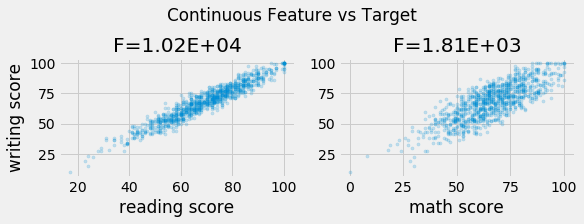

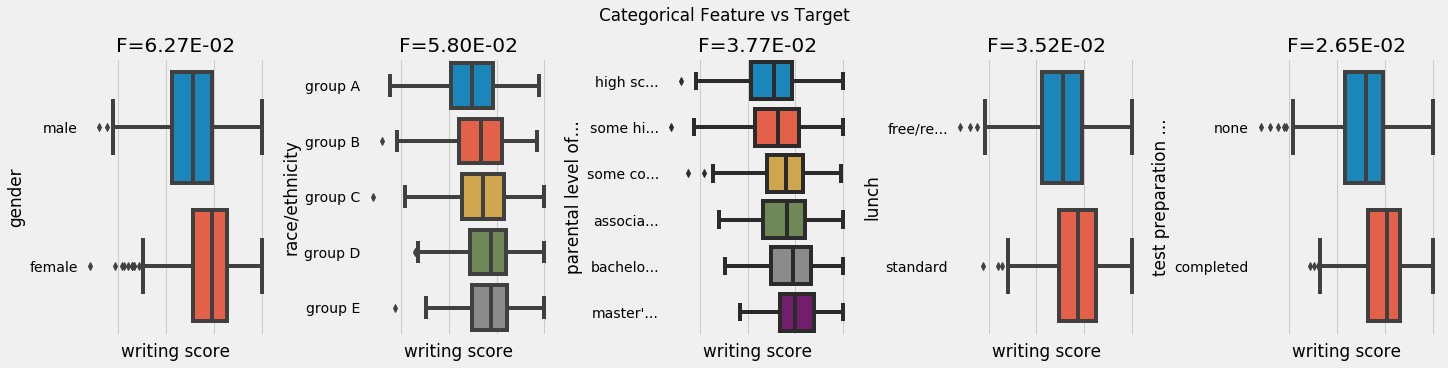

In [8]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'writing score')

In [9]:
total = data.shape[0]
math_greater_fifty = 0
for i in data['math score']:
    if i > 50:
        math_greater_fifty += 1
probability_math_greater_fifty = math_greater_fifty/total
print(probability_math_greater_fifty)

0.85


In [10]:
total = data.shape[0]
reading_greater_fifty = 0
for i in data['reading score']:
    if i > 50:
        reading_greater_fifty += 1
probability_reading_greater_fifty = reading_greater_fifty/total
print(probability_reading_greater_fifty)

0.903


In [11]:
total = data.shape[0]
writing_greater_fifty = 0
for i in data['writing score']:
    if i > 50:
        writing_greater_fifty += 1
probability_writing_greater_fifty = writing_greater_fifty/total
print(probability_writing_greater_fifty)

0.876


In [12]:
total_students = data.shape[0]
number_of_students_passing_in_all_subjects = data[(data['math score'] > 40) &
                                                  (data['writing score'] > 40) & 
                                                  (data['reading score'] > 40)].shape[0]
probability_of_students_passing_in_all_the_subjects = (number_of_students_passing_in_all_subjects/total_students)*100
print("The Probability of Students Passing in all the Subjects is {0:.2f} %".format(probability_of_students_passing_in_all_the_subjects))

The Probability of Students Passing in all the Subjects is 93.90 %


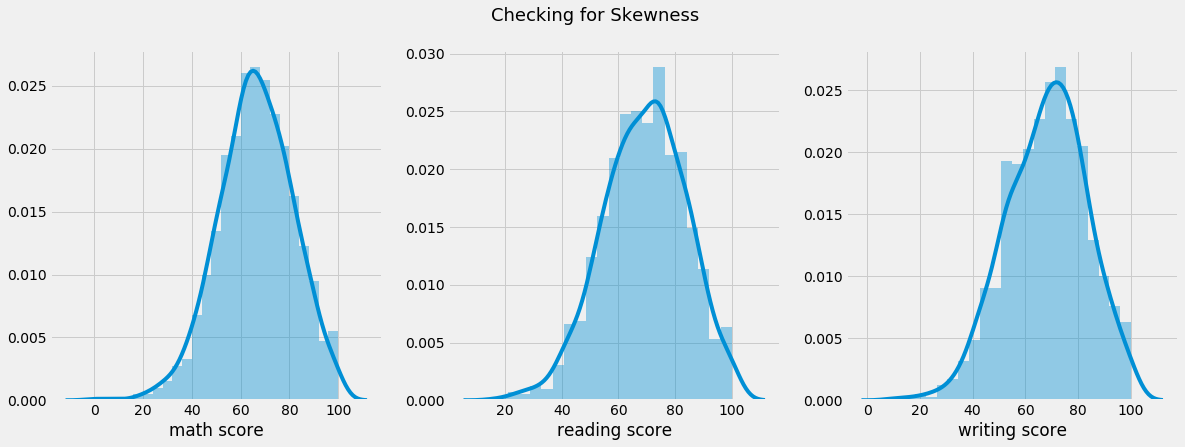

In [13]:
plt.subplot(1, 3, 1)
sns.distplot(data['math score'])

plt.subplot(1, 3, 2)
sns.distplot(data['reading score'])

plt.subplot(1, 3, 3)
sns.distplot(data['writing score'])

plt.suptitle('Checking for Skewness', fontsize = 18)
plt.show()

In [16]:
data[(data['gender'] == 'female') &
     (data['math score'] > 90) & 
     (data['writing score'] > 90) &
     (data['reading score'] > 90)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
114,female,group E,bachelor's degree,standard,completed,99,100,100
165,female,group C,bachelor's degree,standard,completed,96,100,100
179,female,group D,some high school,standard,completed,97,100,100
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
546,female,group A,some high school,standard,completed,92,100,97
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100
594,female,group C,bachelor's degree,standard,completed,92,100,99
685,female,group E,master's degree,standard,completed,94,99,100
712,female,group D,some college,standard,none,98,100,99


In [17]:
data['total_score'] = data['math score'] + data['reading score'] + data['writing score']

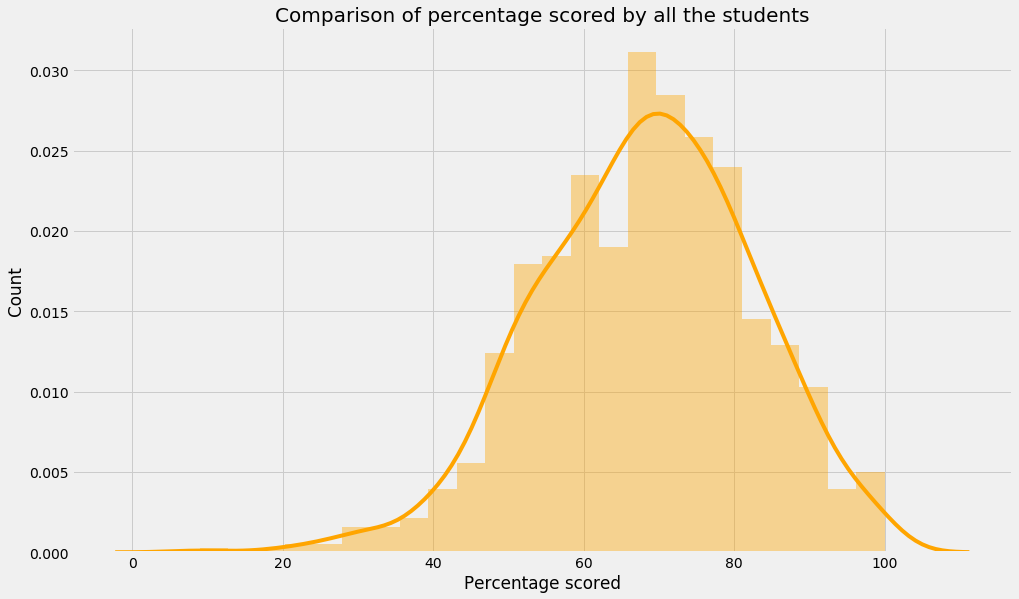

In [18]:
from math import * 
import warnings
warnings.filterwarnings('ignore')

data['percentage'] = data['total_score']/3

for i in range(0, 1000):
    data['percentage'][i] = ceil(data['percentage'][i])

plt.rcParams['figure.figsize'] = (15, 9)
sns.distplot(data['percentage'], color = 'orange')

plt.title('Comparison of percentage scored by all the students', fontweight = 30, fontsize = 20)
plt.xlabel('Percentage scored')
plt.ylabel('Count')
plt.show()

In [21]:
def getgrade(percentage):
  
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'

data['grades'] = data.apply(lambda x: getgrade(x['percentage']), axis = 1 )

data['grades'].value_counts()

B    260
C    252
D    248
A    156
O     58
E     26
Name: grades, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['lunch'] = le.fit_transform(data['lunch'])
data['test preparation course'] = le.fit_transform(data['test preparation course'])
# we have to map values to each of the categories
data['race/ethnicity'] = data['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E', 5)

data['parental level of education'] = le.fit_transform(data['parental level of education'])
data['gender'] = le.fit_transform(data['gender'])

In [23]:
data.shape

(1000, 11)

In [24]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,percentage,grades
0,0,2,1,1,1,72,72,74,218,73.0,B
1,0,3,4,1,0,69,90,88,247,83.0,A
2,0,2,3,1,1,90,95,93,278,93.0,O
3,1,1,0,0,1,47,57,44,148,50.0,D
4,1,3,4,1,1,76,78,75,229,77.0,B
...,...,...,...,...,...,...,...,...,...,...,...
995,0,5,3,1,0,88,99,95,282,94.0,O
996,1,3,2,0,1,62,55,55,172,58.0,D
997,0,3,2,0,0,59,71,65,195,65.0,C
998,0,4,4,1,0,68,78,77,223,75.0,B


In [31]:
x = data.iloc[:,:10]
y = data.iloc[:,10]

In [32]:
x

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,percentage
0,0,2,1,1,1,72,72,74,218,73.0
1,0,3,4,1,0,69,90,88,247,83.0
2,0,2,3,1,1,90,95,93,278,93.0
3,1,1,0,0,1,47,57,44,148,50.0
4,1,3,4,1,1,76,78,75,229,77.0
...,...,...,...,...,...,...,...,...,...,...
995,0,5,3,1,0,88,99,95,282,94.0
996,1,3,2,0,1,62,55,55,172,58.0
997,0,3,2,0,0,59,71,65,195,65.0
998,0,4,4,1,0,68,78,77,223,75.0


In [33]:
y

0      B
1      A
2      O
3      D
4      B
      ..
995    O
996    D
997    C
998    B
999    A
Name: grades, Length: 1000, dtype: object

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [35]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

In [36]:
from sklearn.linear_model import LogisticRegression
model =  LogisticRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
# calculating the classification accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.8
Testing Accuracy : 0.768


In [38]:
y_pred.shape

(250,)

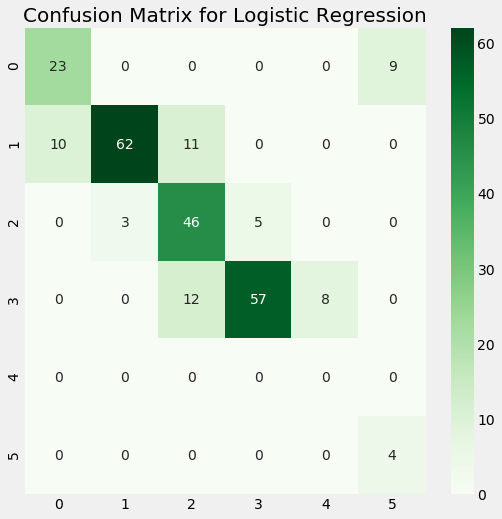

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)

plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Greens')
plt.title('Confusion Matrix for Logistic Regression', fontweight = 30, fontsize = 20)
plt.show()

In [39]:
192/250

0.768

In [40]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 1.0


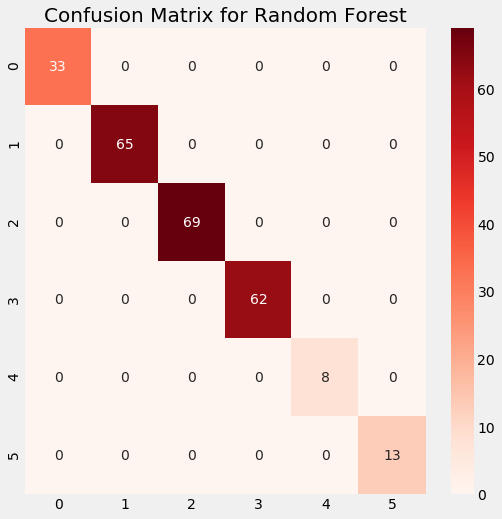

In [41]:
from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.title('Confusion Matrix for Random Forest', fontweight = 30, fontsize = 20)
plt.show()